In [ ]:
###### from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [7]:
irisset=datasets.load_iris()

In [8]:
#You can see whats is available for this dataset by using the method keys
irisset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
X=irisset.data # obtaining features needed for Dimensionality reduction

In [9]:
#Target classes to predict
irisset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
#The information about the class of each sample of our iris dataset is stored in the target attribute of the dataset.
#i.e class 0:iris setosa, class 1 :iris versicolor, class 2:iris virginica
Y=irisset.target

In [5]:
pca=PCA(n_components=2)# creating an instance of PCA Class


In [13]:

#pca.fit(X) computes some vectors(principal axis) that you can project your data in order to reduce the dimensions of the data
# when you call transform(X) you are asking sklearn to project your data into Principal axis created when fit was called
#The two commands are then just combined into one line 
Xp=pca.fit(X).transform(X)

In [14]:
Xp.shape# Xp contains our dimensionality reduced data ie Features have been reduced from 4 to 2

(150, 2)

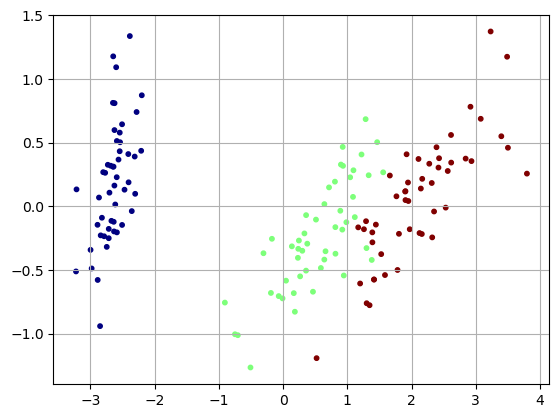

In [15]:
#plotting principal components.i.e our projected data
plt.figure(1)
plt.scatter(Xp[:,0],Xp[:,1],c=Y,cmap="jet",s=10)# include c=Y, to make each class(species) distinguishable in the scatter plot
plt.grid(1,which="both")
plt.axis("tight")
plt.show()

#### Now we have managed to  reduce our data Dimensions from 4 to 2, but the biggest question is:
### Have we lost much information by reducing the dimensions of our data??????
#### The remainder of the section tries to answer that

#### We start by grouping our Dimensionality reduced data(Xp) into three clusters using GaussianMixture Model
#### We then use the created model to predict whether our data points(Xp) belongs to cluster 0 ,1 and 2 which corresponds to the 
#### three target classes
#### Finally, we use Confusion Matrix to compare the predictions made against the true labels(Y)

#### Suprisingly enough , only three data points are predicted inaccurately, which shows we havent lost much info by compressing 
#### our original data

GMM=GaussianMixture(n_components=3)# creating an instance of GaussianMixture Class and specifying the number of clusters to be 3
GMM.fit(Xp)# fitting our data to the three clusters model
y_predG=GMM.predict(Xp)#Getting the mostlikely cluster for each data point. Here the output will be either 0,1 or 2


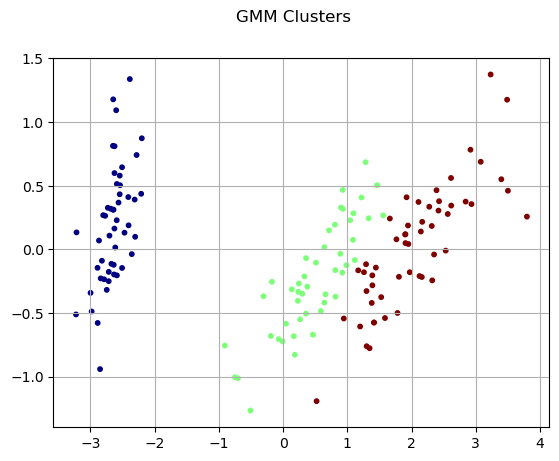

In [24]:
#plotting the GMM Clusters
plt.figure(2)
plt.scatter(Xp[:,0],Xp[:,1],c=y_predG,cmap="jet",s=10)# include c=Y_predG, to make each class(species) distinguishable in the scatter plot
plt.suptitle("GMM Clusters")
plt.grid(1,which="both")
plt.axis("tight")
plt.show()

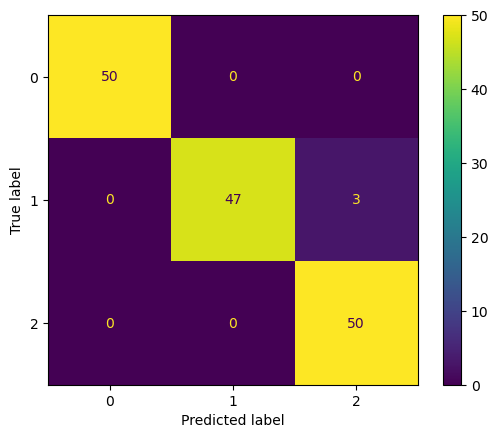

In [33]:
#Visualization confusion matrix
#Diagonal elements shows number of correct prediction,off diagonal elements shows the number of incorrect prediction
cmat=confusion_matrix(Y,y_predG)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cmat,display_labels=None).plot()